###**SUPERVISED LEARNING -BOOSTING ALGORITHMS FOR 8500 SAMPLES PER CLASS.**

# Import Data for X and y

In [27]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
with open('/content/df_features_train8500.pickle', 'rb') as f:
    df_train = pickle.load(f)

In [29]:
df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,chroma_10,chroma_11,contrast_0,contrast_1,contrast_2,contrast_3,contrast_4,contrast_5,contrast_6,targets
bass_synthetic_072-103-050,1,-259.120392,16.254854,-48.653900,56.044502,-48.498081,49.107578,-28.063169,33.163216,-29.868616,...,0.016615,0.021126,18.358565,26.506755,23.400589,24.589065,33.968219,30.536804,70.548043,0
bass_electronic_005-041-075,1,-445.705505,123.459839,62.945370,31.896797,25.574553,24.210548,14.594964,0.539918,-4.144855,...,0.019849,0.042269,29.413068,22.887350,27.154730,28.345323,21.895214,15.876317,38.530831,0
bass_electronic_032-048-050,0,-441.677917,54.611637,19.976978,48.740196,18.194162,17.925045,13.445016,-5.536787,5.831507,...,0.132179,0.135995,34.581794,29.261612,24.449808,21.815215,19.180553,23.966423,53.539505,0
bass_synthetic_084-057-075,1,-267.839111,111.263550,-42.105766,1.328193,-11.390604,8.398848,-12.949695,-7.446430,-16.948307,...,0.103571,0.024353,21.855462,25.989365,31.744667,26.859090,26.837624,23.338994,50.647930,0
bass_synthetic_114-082-127,1,-264.461121,36.348366,-42.848892,43.289532,-22.449223,25.279791,5.725794,35.342300,23.236238,...,0.858397,0.068264,17.983583,16.328056,13.776016,33.808865,28.329224,27.039600,64.354064,0


In [30]:
df_train.shape

(85000, 162)

In [31]:
with open('/content/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

In [32]:
df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865845,46.664154,34.379803,24.787596,17.420425,10.198804,4.609536,1.380600,-1.023340,...,0.034162,0.035634,0.025365,0.019434,0.039115,0.092514,0.086638,0.061319,0.091409,0
keyboard_electronic_001-021-127,0,-444.644012,193.890533,27.298918,-3.689526,6.295263,8.093068,10.283858,6.089181,2.495069,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4
guitar_acoustic_010-066-100,0,-439.373413,59.546818,2.895078,-12.039842,-12.553241,-11.451952,-12.535439,-20.456724,-19.256969,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3
reed_acoustic_037-068-127,1,-372.987457,68.796799,-39.474766,-22.089413,-50.149693,-16.565742,-29.849129,-16.627386,-17.712204,...,0.366166,0.036109,0.006731,0.023056,0.020713,0.885966,0.061736,0.016221,0.002263,7
flute_acoustic_002-077-100,1,-364.779663,12.566915,-42.826504,19.884624,-29.598232,-21.321131,-18.308311,-9.495085,7.672026,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2


In [33]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(labels=['targets'], axis=1),
                                                    df_train['targets'],
                                                    test_size=0.05,
                                                    random_state=42)

In [34]:
X_test.shape

(4250, 161)

In [35]:
y_test.shape

(4250,)

# Define Confusion Matrix Function

In [36]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [37]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar',
             'keyboard', 'mallet', 'organ', 'reed',
             'string', 'vocal'])

# Adaptive Boosting

In [38]:
# Create adaboost classifer object
ada = AdaBoostClassifier(n_estimators=256,
                         learning_rate=1)

In [39]:
# Train Adaboost Classifer
model = ada.fit(X_train,
                y_train)

In [40]:
y_pred_ada = ada.predict(X_test)
accuracy_ada = np.mean(y_pred_ada == y_test)
print("The accuracy of Adaptive Boosting is {0:.2%}".format(accuracy_ada))

The accuracy of Adaptive Boosting is 48.05%


Normalized confusion matrix
[[0.30361446 0.02891566 0.05783133 0.12048193 0.06987952 0.1253012
  0.13493976 0.03373494 0.02650602 0.09879518]
 [0.00239808 0.6618705  0.03117506 0.05995204 0.01438849 0.06235012
  0.00479616 0.06714628 0.06954436 0.0263789 ]
 [0.02955665 0.0270936  0.55418719 0.         0.00985222 0.00492611
  0.02463054 0.17487685 0.04187192 0.13300493]
 [0.19068736 0.04656319 0.02217295 0.33924612 0.04878049 0.15742794
  0.0864745  0.02217295 0.05321508 0.03325942]
 [0.17449664 0.10290828 0.03803132 0.17002237 0.13870246 0.1409396
  0.1163311  0.04026846 0.03355705 0.04474273]
 [0.14467005 0.10152284 0.08375635 0.11167513 0.04822335 0.34517766
  0.05583756 0.03299492 0.05583756 0.02030457]
 [0.06682028 0.02073733 0.00921659 0.03686636 0.03456221 0.01152074
  0.74193548 0.01382488 0.         0.06451613]
 [0.04555315 0.08893709 0.22559653 0.02603037 0.01518438 0.01952278
  0.01301518 0.39479393 0.04121475 0.13015184]
 [0.04136253 0.06812652 0.00486618 0.05109489 0.034063

<Axes: title={'center': 'Adaptive boosting Normalized confusion matrix - 8500 samples'}, xlabel='Predicted label', ylabel='True label'>

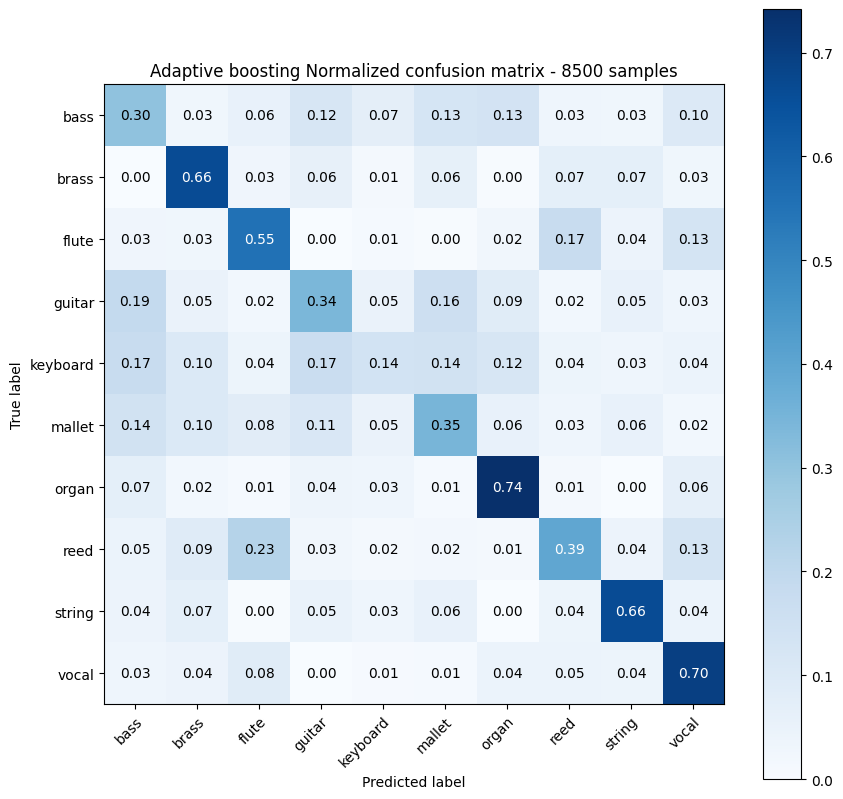

In [49]:
plot_confusion_matrix(y_test, y_pred_ada, classes=class_names, normalize=True,
                      title='Adaptive boosting Normalized confusion matrix - 8500 samples')

# Gradient Boosting

In [16]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.01)

In [17]:
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [18]:
y_pred_GB = gradient_booster.predict(X_test)
accuracy_GB = np.mean(y_pred_GB == y_test)
print("The accuracy of Gradient boosting is {0:.2%}".format(accuracy_GB))

The accuracy of Gradient boosting is 49.98%


Normalized confusion matrix
[[0.34457831 0.02650602 0.02409639 0.12289157 0.14216867 0.16144578
  0.05060241 0.04819277 0.03373494 0.04578313]
 [0.00959233 0.49880096 0.04076739 0.07673861 0.09352518 0.06714628
  0.         0.05275779 0.117506   0.04316547]
 [0.04679803 0.0270936  0.5591133  0.00246305 0.02216749 0.01970443
  0.00985222 0.14778325 0.11083744 0.05418719]
 [0.14412417 0.02217295 0.         0.3059867  0.22394678 0.20399113
  0.02660754 0.02217295 0.01108647 0.03991131]
 [0.08948546 0.03355705 0.01565996 0.09619687 0.4295302  0.1901566
  0.05145414 0.05369128 0.00447427 0.03579418]
 [0.05076142 0.02030457 0.02030457 0.06345178 0.10406091 0.64720812
  0.03299492 0.02791878 0.00761421 0.02538071]
 [0.04147465 0.01843318 0.02073733 0.01612903 0.07142857 0.04147465
  0.67050691 0.02764977 0.00230415 0.08986175]
 [0.03253796 0.11930586 0.13882863 0.05856833 0.01735358 0.04338395
  0.01084599 0.43817787 0.11062907 0.03036876]
 [0.01946472 0.00729927 0.0243309  0.05352798 0.06812

<Axes: title={'center': 'Gradient boosting Normalized confusion matrix - 8500 samples'}, xlabel='Predicted label', ylabel='True label'>

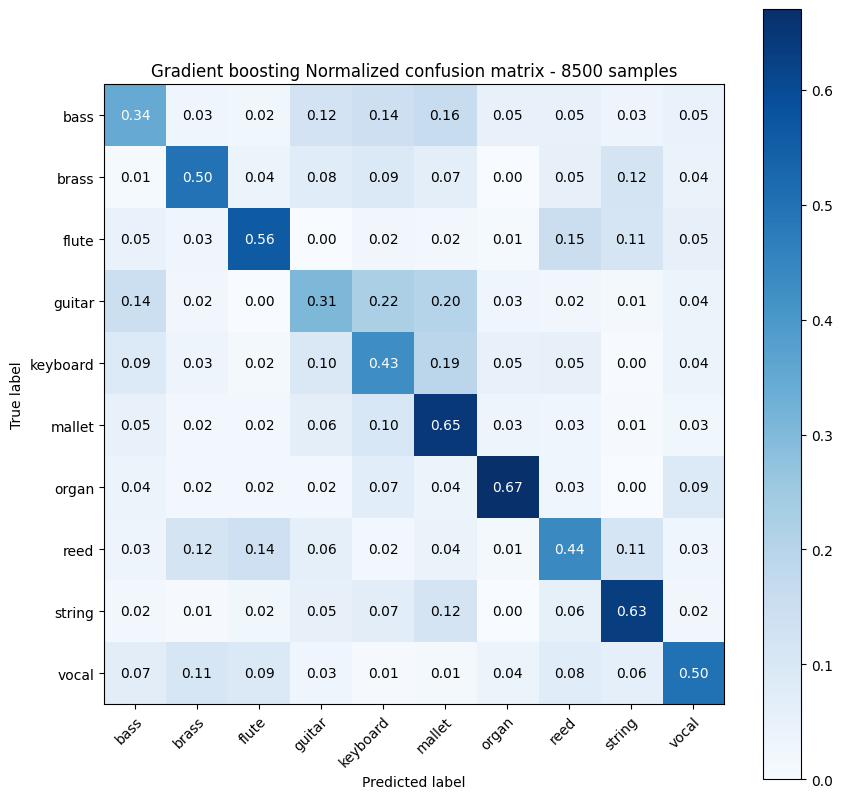

In [19]:
plot_confusion_matrix(y_test, y_pred_GB, classes=class_names, normalize=True,
                      title='Gradient boosting Normalized confusion matrix - 8500 samples')

# Extreme Gradient Boosting

In [42]:
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [43]:
# Get the number of unique classes
num_classes = len(np.unique(y_train))
print(num_classes)

10


In [44]:
n=512
params = {
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': num_classes,
    'max_depth': 16,
    'eta': 0.005,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'min_child_weight': 8,
    'gamma': 0.2,
    'alpha': 0.02,
    'lambda': 0.02,
    'learning_rate': 0.001,
    'grow_policy': 'lossguide',  # Use loss-guided growing policy for more complex trees
    'max_leaves': 3000,  # Increase max_leaves for more complex trees
    'max_bin': 512,  # Increase max_bin for more split points
    'sample_type': 'weighted',  # Use weighted sampling for imbalanced datasets
    'normalize_type': 'tree',  # Normalize each tree's weight for better generalization
    'rate_drop': 0.2,  # Randomly drop a fraction of trees for regularization
    'skip_drop': 0.5,  # Probability of skipping dropout during each iteration
    'seed': 42
}

# Train the model
XGBmodel = xgb.train(params,
                     xgb_train,
                     num_boost_round=n)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:24:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "normalize_type", "rate_drop", "sample_type", "skip_drop" } are not used.

  warnings.warn(smsg, UserWarning)


In [45]:
XGB_preds = XGBmodel.predict(xgb_test)
# Convert predicted probabilities to class labels
y_pred_XGB_classes = np.argmax(XGB_preds, axis=1)

In [46]:
# Calculate accuracy
accuracy_XGB = np.mean(y_pred_XGB_classes == y_test)
print("The accuracy of Extreme Gradient Boosting is {0:.2%}".format(accuracy_XGB))

The accuracy of Extreme Gradient Boosting is 87.46%


In [47]:
accuracy= accuracy_score(y_test,y_pred_XGB_classes)
print('Accuracy of the model is:', accuracy*100)

Accuracy of the model is: 87.45882352941177


Normalized confusion matrix
[[0.70361446 0.00722892 0.00722892 0.08433735 0.05542169 0.08674699
  0.02891566 0.00963855 0.00481928 0.01204819]
 [0.00239808 0.9616307  0.00239808 0.00239808 0.         0.
  0.         0.01678657 0.00959233 0.00479616]
 [0.00492611 0.00492611 0.97044335 0.00246305 0.         0.
  0.00246305 0.00985222 0.00492611 0.        ]
 [0.05321508 0.00665188 0.00443459 0.76274945 0.08203991 0.06873614
  0.01330377 0.         0.00665188 0.00221729]
 [0.04026846 0.02237136 0.         0.03803132 0.76733781 0.07158837
  0.02237136 0.02237136 0.00223714 0.01342282]
 [0.01522843 0.         0.00507614 0.02538071 0.05837563 0.85786802
  0.00507614 0.00253807 0.01015228 0.02030457]
 [0.01382488 0.00460829 0.         0.         0.03225806 0.00921659
  0.92626728 0.01152074 0.         0.00230415]
 [0.01735358 0.02603037 0.04555315 0.00433839 0.0021692  0.0021692
  0.00433839 0.88286334 0.00867679 0.00650759]
 [0.00973236 0.00243309 0.00486618 0.00486618 0.00486618 0.00486618
 

<Axes: title={'center': 'Extreme Gradient boosting Normalized confusion matrix - 8500 samples'}, xlabel='Predicted label', ylabel='True label'>

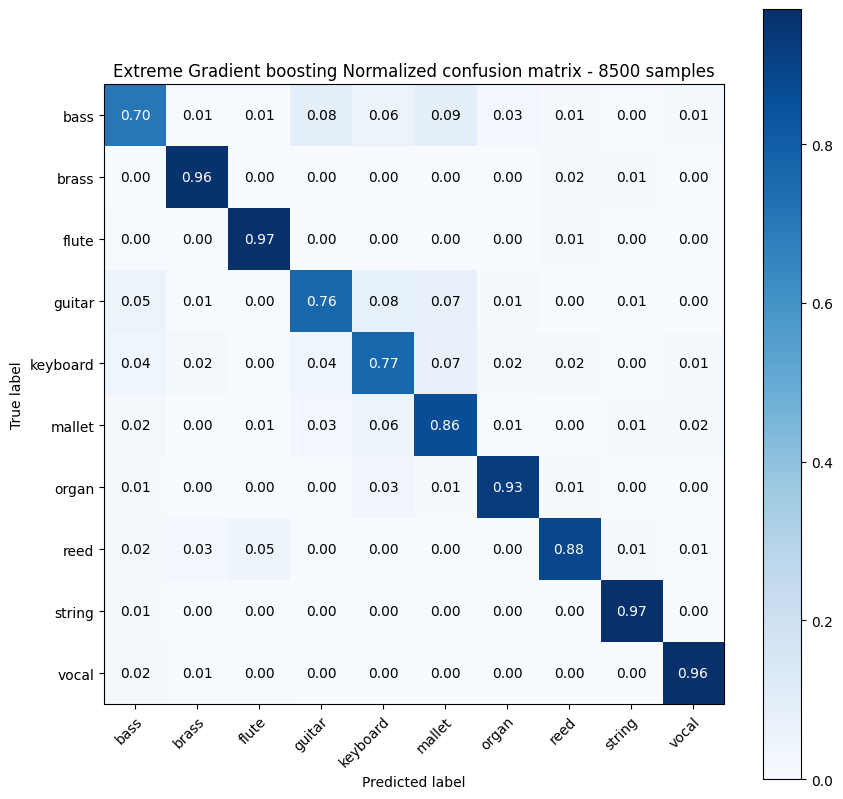

In [48]:
plot_confusion_matrix(y_test, y_pred_XGB_classes, classes=class_names, normalize=True,
                      title='Extreme Gradient boosting Normalized confusion matrix - 8500 samples')